# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 574


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
city_url = url + "&q=" + city.replace(" ","+")

city_weather = requests.get(city_url).json()
pprint(city_weather)

{'base': 'stations',
 'clouds': {'all': 69},
 'cod': 200,
 'coord': {'lat': 42.6001, 'lon': -73.9662},
 'dt': 1682445773,
 'id': 5106841,
 'main': {'feels_like': 8.6,
          'humidity': 55,
          'pressure': 1020,
          'temp': 10.1,
          'temp_max': 12.1,
          'temp_min': 7.81},
 'name': 'Albany',
 'rain': {'1h': 1.13},
 'sys': {'country': 'US',
         'id': 19530,
         'sunrise': 1682416757,
         'sunset': 1682466486,
         'type': 2},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'moderate rain',
              'icon': '10d',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 272, 'gust': 3.56, 'speed': 2.74}}


In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #pprint(city_weather)
      
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ashta
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | coahuayana de hidalgo
Processing Record 5 of Set 1 | isafjordur
Processing Record 6 of Set 1 | mata-utu
Processing Record 7 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 8 of Set 1 | stornoway
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | lerwick
Processing Record 11 of Set 1 | bilibino
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | polovinnoye
Processing Record 14 of Set 1 | kalianget
Processing Record 15 of Set 1 | akhuryan
Processing Record 16 of Set 1 | san patricio
Processing Record 17 of Set 1 | puerto lempira
Processing Record 18 of Set 1 | kasongo-lunda
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | tolanaro
Processing Record 21 of Set 1 | kailua-kona
Processing 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

city_data_df= pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ashta,23.0167,76.7167,29.70,19,80,1.87,IN,1682445779
1,bethel,41.3712,-73.4140,14.79,46,89,0.89,US,1682445779
2,grytviken,-54.2811,-36.5092,3.91,98,100,4.66,GS,1682445780
3,coahuayana de hidalgo,18.7000,-103.6583,32.01,40,94,3.32,MX,1682445780
4,isafjordur,66.0755,-23.1240,0.02,55,40,6.69,IS,1682445780


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ashta,23.0167,76.7167,29.70,19,80,1.87,IN,1682445779
1,bethel,41.3712,-73.4140,14.79,46,89,0.89,US,1682445779
2,grytviken,-54.2811,-36.5092,3.91,98,100,4.66,GS,1682445780
3,coahuayana de hidalgo,18.7000,-103.6583,32.01,40,94,3.32,MX,1682445780
4,isafjordur,66.0755,-23.1240,0.02,55,40,6.69,IS,1682445780


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [10]:
latitude = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

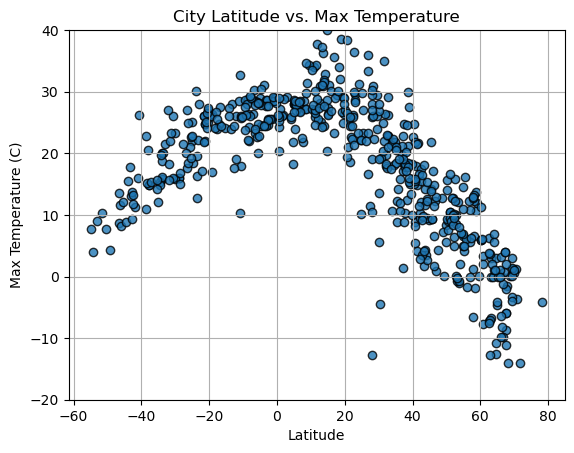

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(latitude,
            max_temp,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (C)")
plt.ylim(-20, 40)
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

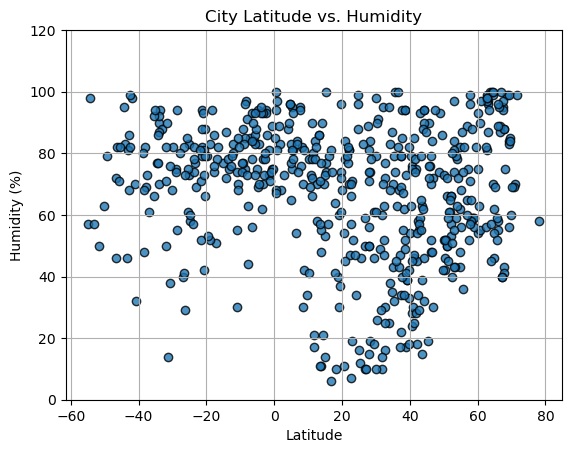

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(latitude,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.ylim(0, 120)
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

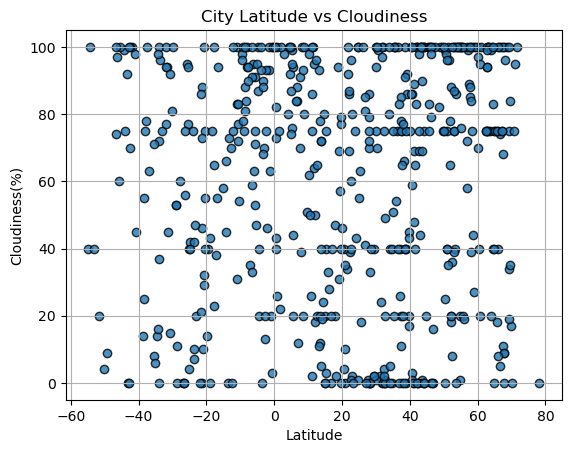

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(latitude,
            cloudiness,
            linewidth=1, marker="o", edgecolors="black",
            alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

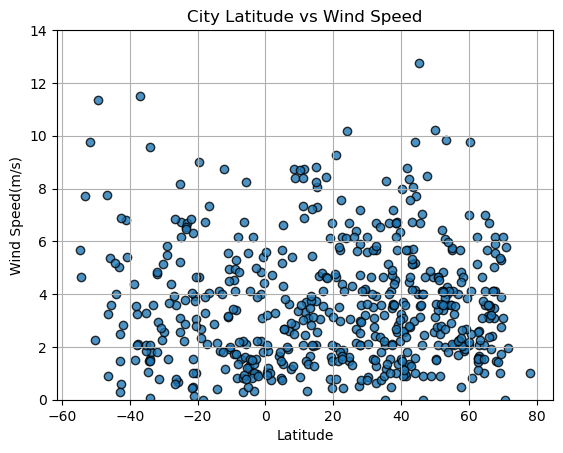

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(latitude,
            wind_speed,
            linewidth=1, marker="o", edgecolors="black",
            alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed")
plt.ylabel("Wind Speed(m/s)")
plt.xlabel("Latitude")
plt.ylim(-0, 14)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates ):
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
    
    line_eq = "y  = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color = "red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f"The r_value is {r_value:.2f}")
    

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ashta,23.0167,76.7167,29.70,19,80,1.87,IN,1682445779
1,bethel,41.3712,-73.4140,14.79,46,89,0.89,US,1682445779
3,coahuayana de hidalgo,18.7000,-103.6583,32.01,40,94,3.32,MX,1682445780
4,isafjordur,66.0755,-23.1240,0.02,55,40,6.69,IS,1682445780
6,stornoway,58.2093,-6.3865,6.63,59,75,2.06,GB,1682445781


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,grytviken,-54.2811,-36.5092,3.91,98,100,4.66,GS,1682445780
5,mata-utu,-13.2816,-176.1745,28.05,75,73,1.86,WF,1682445780
7,port elizabeth,-33.9180,25.5701,20.05,90,0,1.54,ZA,1682445781
10,port-aux-francais,-49.3500,70.2167,4.36,79,9,11.35,TF,1682445782
12,kalianget,-7.0500,113.9333,26.46,85,35,1.55,ID,1682445782


###  Temperature vs. Latitude Linear Regression Plot

The r_value is -0.85


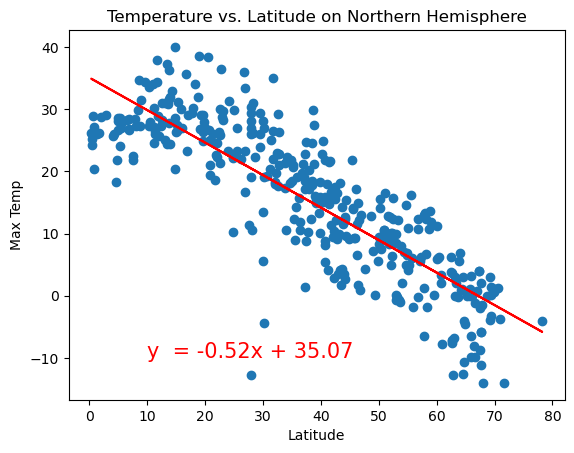

In [24]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
title = "Temperature vs. Latitude on Northern Hemisphere"

plot_linear_regression(x_values, y_values, title, 'Max Temp',(10,-10))


The r_value is 0.80


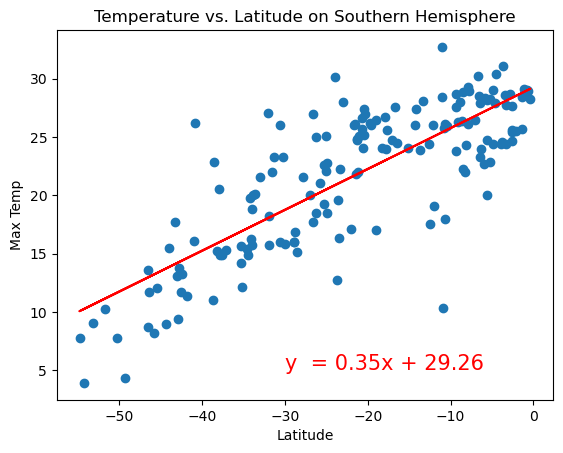

In [25]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
title = "Temperature vs. Latitude on Southern Hemisphere"

plot_linear_regression(x_values, y_values, title, 'Max Temp',(-30,5))

**Discussion about the linear relationship:** There is a strong negative correlation between max temperature and latitude in the northern hemisphere. As shown, the further north the city is from the hemisphere the lower its max temperature is. On the other hand, there is a strong positive correlation between max temperature and latitude in the sourthern hemisphere. The closer the city is to the equator the higher the temperature is. 

### Humidity vs. Latitude Linear Regression Plot

The r_value is 0.08


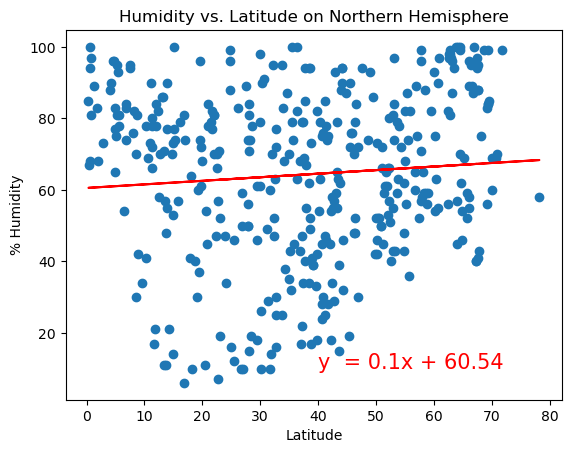

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
title =  "Humidity vs. Latitude on Northern Hemisphere"

plot_linear_regression(x_values, y_values, title, '% Humidity',(40,10))

The r_value is 0.18


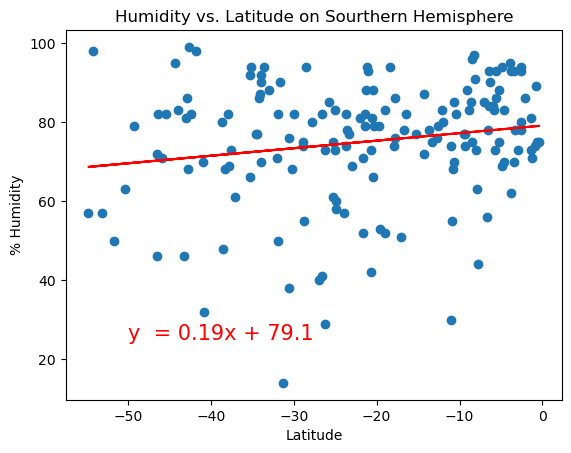

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
title = "Humidity vs. Latitude on Sourthern Hemisphere"

plot_linear_regression(x_values, y_values, title, '% Humidity', (-50, 25))

**Discussion about the linear relationship:** There is little to no correlation between humidity and latitude in the northern and sourthern hemisphere as shown by the scattered data points through the graphs. Although in the southern hemisphere, I can observe that there is a density of cities who are located closer to the equator that have a higher percentage of humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r_value is 0.10


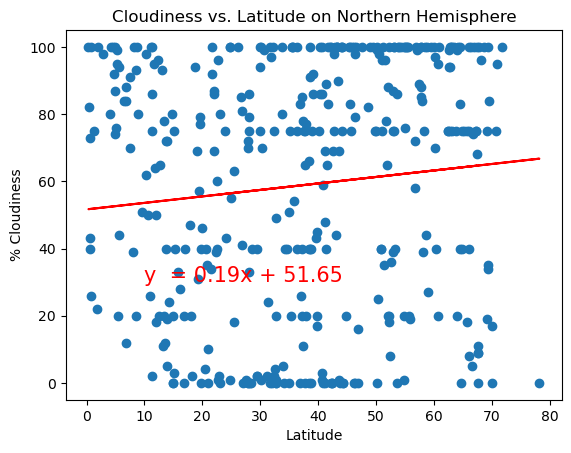

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
title = "Cloudiness vs. Latitude on Northern Hemisphere"

plot_linear_regression(x_values, y_values, title, '% Cloudiness', (10, 30))

The r_value is 0.13


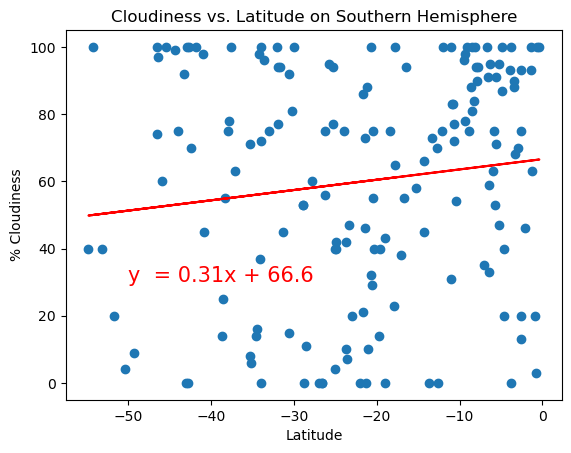

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
title = "Cloudiness vs. Latitude on Southern Hemisphere"

plot_linear_regression(x_values, y_values, title, '% Cloudiness', (-50, 30))

**Discussion about the linear relationship:** There is no correlation between cloudiness and a distance from the equator for the cities’ positions in both the northern and southern hemispheres. Cloudiness levels are widely spread across all latitudes.

### Wind Speed vs. Latitude Linear Regression Plot

The r_value is -0.01


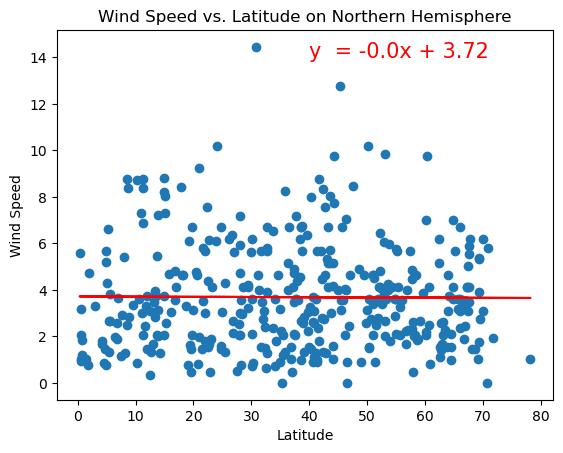

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
title =  "Wind Speed vs. Latitude on Northern Hemisphere"

plot_linear_regression(x_values, y_values, title, 'Wind Speed',(40,14))

The r_value is -0.22


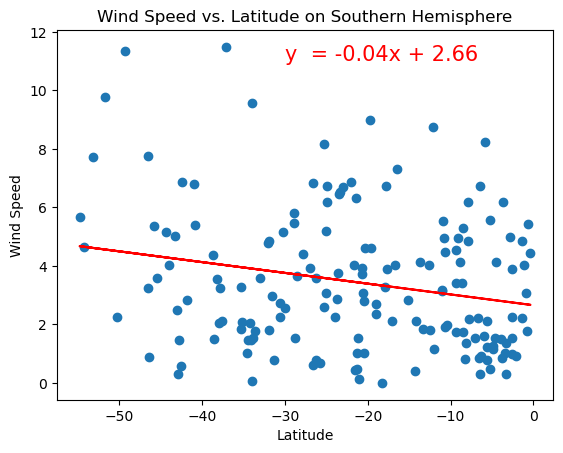

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
title =  "Wind Speed vs. Latitude on Southern Hemisphere"

plot_linear_regression(x_values, y_values, title, 'Wind Speed',(-30,11))

**Discussion about the linear relationship:** There is very low correlation between the wind speed and a latitude on the Northern Hemisphere. Many cities have winds with variable speed levels ranging between 0 mph and 10 mph along the Northern Hemisphere. In the southern hemisphere, there is a low negative correlation between wind speed and latitude. Based on the graph, the wind speed slightly increases the further south away you are from the equator.